# Plotting features with scanpy using plotting.extract
With `calculate_image_features` we can calculate features from the tissue image and save in `adata.obsm`. If you would like to plot a specific feature or another dimension from an entry in `adata.obsm`, you can use the `plotting.extract` function.

In [1]:
# imports
import squidpy as sq
from squidpy.plotting import extract
import scanpy as sc

import os

## Load data and calculate summary features

In [2]:
# set path to dataset
BASE_PATH = "../../data"
dataset_folder = os.path.join(BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla")
# load data
adata, img = sq.read_visium_data(dataset_folder)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [3]:
sq.image.calculate_image_features(adata, img, features=['summary'], key='features')
# summarize features using pca
adata.obsm['pca_features'] = sc.pp.pca(adata.obsm['features'], n_comps=3)

## Plot features from adata.obsm on images
We use extract to generate a temporary adata that has the columns that we'd like to visualize in `.obs`.
Here, we are plotting
 - `summary_quantile_0.5_ch_0` from `features` (median intensity of R channel) 
 - 0th coordinate of `spatial` (x coordinate of spot)
 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


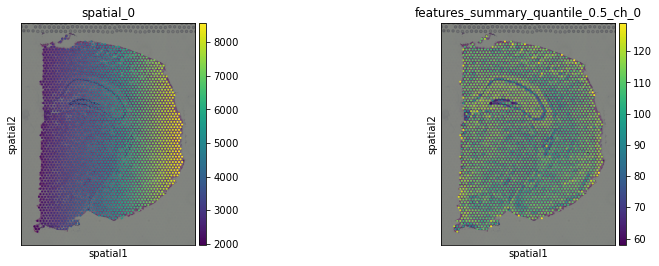

In [4]:
tmp_adata = extract(adata, ['spatial', 'features'], prefix=['spatial', 'features'])

sc.pl.spatial(tmp_adata, color=['spatial_0', 'features_summary_quantile_0.5_ch_0'])

## Plot features on umap
We can use any scanpy plotting function with the adata returned by `extract()`.
Here, we are plotting the above features on a gene-space umap.

In [5]:
# calculate umap for visualization
sc.pp.normalize_total(adata, target_sum=1e6, exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.pca(adata,n_comps=10,use_highly_variable =False)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10, metric='correlation')
sc.tl.umap(adata)

/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


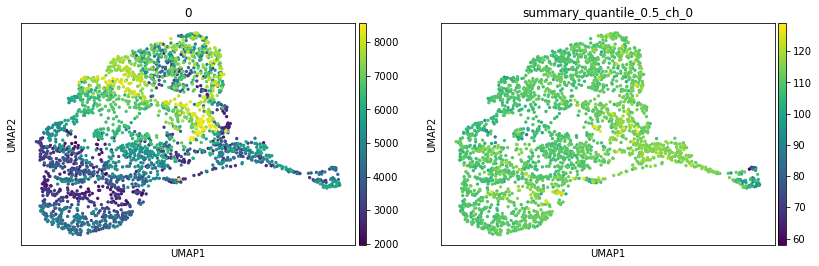

In [7]:
sc.pl.umap(extract(adata, ['spatial', 'features']), color=['0', 'summary_quantile_0.5_ch_0'])